# Before we begin 

1. Start a new project in SherlockML. 
2. Spin up a server. 
3. Open a terminal and clone the repository containing this notebook:
    ``git clone https://github.com/liamcoatman/pandas-ucl.git``

# Jupyter Notebook Basics

This is a Jupyter notebook. The Jupyter Notebook is an open-source web application that allows you to create and share documents that contain live code, equations, visualizations and explanatory text. 

#### Notebooks have two different keyboard input modes:
1. <b>Edit mode</b> allows you to type code/text into a cell and is indicated by a green cell border. 
2. <b>Command mode</b> binds the keyboard to notebook level actions and is indicated by a grey cell border.
<br>

Change from edit to command mode by pressing `esc`. And change back by hitting `enter` 

#### Types of cells

This is a Markdown cell

In [ ]:
print("This is a Python cell!")

#### Change, add and delete cells in command mode
- Change cell type from code to markdown by pressing `m`. Change it back to code with `y`. Or use the drop down menu. 
- Add a cell above with `a` and below with `b`
- Delete a cell with `dd`

Type `h` for more keyboard shortcuts. 

#### Running commands

To run a command, click in the cell and click the play button above or press ctrl+enter (or shift+enter which automatically places your cursor in the next cell down, or alt+enter to also add a new cell below). 

In [ ]:
# shorthand for print 1+2 , can only be used once per cell to avoid ambiguity
1 + 2 

In [ ]:
# a semi-colon supresses the cell output
1 + 2;

Bash commands start with a '!' 

In [ ]:
!pwd

In [ ]:
!ls

# Python Basics 

Python is an easy to learn, powerful programming language. Python’s elegant syntax and dynamic typing, together with its interpreted nature, make it an ideal language for data science. 

In [ ]:
import this

## Hello world 

In [ ]:
print('Hello Python world!')

That's it! This simplicity makes Python very quick to develop in. 

In [ ]:
from IPython.display import Image
Image('img/python.png', width=400)

#### Aside: Python 2 vs Python 3

There are two versions of Python which are very commonly used: Python 2 and 3. 

If you are using Python 2.7, you would instead type:

In [ ]:
print "Hello Python world!"

If possible, use Python 3! 

But be aware - Python 3 broke backward compatibility, and much Python 2 code does not run un-modified on Python 3. 

### Packages

__Batteries included__: Having a rich and versatile standard library which is immediately available (sys, os, time, shutil, glob, re, random). 

In addition, Python has a bunch of extremely useful third-party packages for doing scientific analysis. In Python there is package to do everything. This is a key reason for the rapid adoption of Python in science. 

__Numpy__ is the fundamental library for data science. __Numpy__ gives us *fast* and *powerful* tools for numerical operations on large, multi-dimensional arrays of data. Which as you can image is useful for much of data science!

__Pandas__ is a library built on top of numpy which makes analysing messy, real-world datasets more intuitive. Pandas adds more functionality and a wonderfully useful 2-dimensional data structure known as a `DataFrame`.

Knowing how to use these libraries will make the slog of understanding your data and getting it into a useable state much easier. 

# Numpy

In [ ]:
# You will always see these libraries imported in the following way
import numpy as np

## Getting help

Think np has a sum method? Let's check!

In [ ]:
np.su*?

To display all the contents of the numpy namespace

```ipython
In [3]: np.<TAB>
```

To display Numpy's built-in documentation:

```ipython
In [4]: np?
```

In general, make extensive use of documentation & Stack Overflow. Numpy and Pandas have so many users that any question you have has likely been asked and answered on Stack Overflow. Other useful resources:

- [Pandas online documentation](http://pandas.pydata.org/)
- [Numpy online documentation](https://docs.scipy.org/doc/)
- [* Python Data Science Handbook*](http://shop.oreilly.com/product/0636920023784.do) Written by Jake VanderPlas.  
- [*Python for Data Analysis*](http://shop.oreilly.com/product/0636920023784.do) Written by Wes McKinney (the original creator of Pandas). Second edition out soon. 

In [ ]:
Image(filename='img/datasciencehandbook.jpg', width=300) 

Freely available as Jupyter Notebooks [here](https://github.com/jakevdp/PythonDataScienceHandbook).

## Why do we care about numpy?

Python is quick to develop in, but can be slow to execute. With Numpy...

1. Our code is faster
3. Our code is (often) more readable
2. Our code is (almost always) more intuitive

#### For example:  Implementing a simple  [random walk](https://en.wikipedia.org/wiki/Random_walk)

i.e. at each step, move either one place forward or one place backward

In [ ]:
# python implementation - requires for loop
import random

def random_walk(n):
    '''Randomly walk n steps'''
    position = 0
    walk = [position]
    for i in range(n):
        position += random.choice([-1, 1])
        walk.append(position)
    return walk

%timeit random_walk(10000) # timeit is a "magic" ipython command - see the documentation for others

In [ ]:
# numpy implementation - no for loop, ~100x faster, more readable
def random_walk(n):
    '''Randomly walk n steps'''
    steps = np.random.choice([-1, 1], size=n) 
    return np.cumsum(steps)

%timeit random_walk(10000)

The idea of removing `for` loops in favour of creating and manipulating whole arrays at a time is central to numerical computing in Python, and most of what follows focuses on it. This is known as a *vectorized* operation. This vectorized approach is designed to push the loop into compiled C code that NumPy calls, leading to much faster execution.

You can make use of this by using numpy arrays rather than python lists, and using:
1. <b><a href=http://docs.scipy.org/doc/numpy/reference/ufuncs.html>Ufuncs</a></b> for element-wise operations on arrays (+, -, *, /, etc.)
2. <b>Aggregations</b> for summarizing the values of an array (e.g. np.min, np.max, np.sum, np.mean)
3. <b><a href=http://scipy.github.io/old-wiki/pages/EricsBroadcastingDoc>Broadcasting</a></b> for combining arrays
4. <b><a href=http://docs.scipy.org/doc/numpy/reference/arrays.indexing.html>Indexing and slicing</a></b> 

We will see examples of all of these in the remainder of the notebook. 

# Hello Numpy World 
Let's see what I'm on about. 

We'll cover:
    
    i. Creating data arrays
    ii. Indexing 
    iii. Reshaping arrays
    iv. Broadcasting scalars and arrays to different sizes


## i. Creating data

Create a numpy array from a Python list

In [97]:
type([0, 1, 2])

list

In [98]:
type(np.array([0, 1, 2]))

numpy.ndarray

Create a 5-element array of zeros

In [99]:
np.zeros(5)

array([ 0.,  0.,  0.,  0.,  0.])

Create a 3x5 array of integer ones

In [101]:
np.ones((3, 5), dtype=int)

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]])

Create an evenly spaced array of length 5 between 0 and 1 

In [102]:
np.linspace(0, 1, 5)

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ])

Create a 4x3 array of random integers between 0 and 6

In [104]:
a = np.random.randint(0, 6, (4, 3))

Create an array of zeros of the same shape

In [105]:
np.zeros_like(a)

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

## ii. Access data by indexing

In [106]:
a = np.arange(9).reshape(3,3)
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

Item by index

In [110]:
a[1, 2]

5

Row by index

In [111]:
a[0, :]

array([0, 1, 2])

Column by index

In [112]:
a[:, 2]

array([2, 5, 8])

In [113]:
b = np.arange(10)
b

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Every element from the 2nd to the 6th 

In [115]:
b[2:7]

array([2, 3, 4, 5, 6])

Every other element

In [116]:
b[::2]

array([0, 2, 4, 6, 8])

The final element

In [119]:
b[-2]

8

The third and eighth elements

In [120]:
b[[2, 7]]

array([2, 7])

In [124]:
i = np.ones_like(b, dtype=bool)

In [125]:
i[0] = False

In [126]:
i

array([False,  True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

In [127]:
b[i]

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

## iii. Reshaping

In [128]:
z = np.arange(6)
z

array([0, 1, 2, 3, 4, 5])

z is one-dimensional array

In [129]:
z.shape

(6,)

Reshape z by adding an extra dimension

In [131]:
z2 = z.reshape(len(z), 1)

In [135]:
z[:, np.newaxis]

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5]])

In [133]:
z2.shape

(6, 1)

Reshape z into a 3x2 array

In [138]:
z = z.reshape()


Transpose z

In [141]:
z.T.shape


(2, 3)

Flatten z

In [146]:
z.flatten().T

array([0, 1, 2, 3, 4, 5])

## iv. Broadcasting
On numpy arrays operations, like `+`, `-`, `*`,  are elementwise. It’s possible to do __operations on arrays of different sizes__ when numpy can transform them to be the same size (known as "broadcasting").

In [147]:
Z = np.arange(9).reshape(3, 3)
Z

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

Add 1 to every element in Z

In [148]:
Z + 1

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

1 was 'broadcast' into the same shape as Z, i.e. `np.ones(shape=(3,3))`

In [149]:
np.alltrue(Z + 1 == Z + np.ones((3, 3)))

True

What would this look like without broadcasting?

In [150]:
for i in range(3):
    for j in range(3):
        Z[i, j] += 1

In [152]:
np.array([0, 4.4, 'hello'])

array(['0', '4.4', 'hello'], 
      dtype='<U32')

# Pandas

In [154]:
import pandas as pd

# have plots render in notebook
%matplotlib inline 

In [155]:
import matplotlib.pyplot as plt

## Introduction

Pandas is a package that builds on the NumPy array structure by introducing ``DataFrame``s, which are essentially multidimensional arrays with attached row and column labels. 
Pandas is the tool of choice for the sort of "data munging" tasks that occupy much of a data scientist's time.
In this (short!) introduction to pandas we will introduce the basic functionalities of pandas which you will find useful on a day to day basis as a data scientist. 

## Pandas objects

Panda's has three fundamental data structures: the ``Series``, ``DataFrame``, and ``Index``.

### Series

A Pandas ``Series`` is a one-dimensional array of indexed data.
One way to create a series is as follows:

In [178]:
data = pd.Series(data=[0.25, 0.5, 0.75, 1.0],
                 index=['a', 'a', 'c', 'd'])
data

a    0.25
a    0.50
c    0.75
d    1.00
dtype: float64

In [179]:
data['a']

a    0.25
a    0.50
dtype: float64

Get the values

In [158]:
type(data.values)

numpy.ndarray

Get the index

In [159]:
data.index

Index(['a', 'b', 'c', 'd'], dtype='object')

Get the second row using integer indexing

In [168]:
data[0]

0.25

Get the same row using using the index

In [170]:
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

A series can also be created from a dictionary. 

In [174]:
age_dict = {'Max': 26,
            'Andy': 25,
            'Ben': 28,
            'Sarah': 26,
            'Anne': 21,
            'Anne': 28}
age = pd.Series(age_dict)
age

Andy     25
Anne     28
Ben      28
Max      26
Sarah    26
dtype: int64

In [176]:
age['Saraddh'] = 30

### Dataframe

The next fundamental structure in Pandas is the ``DataFrame``. If a ``Series`` is an analog of a one-dimensional array with flexible indices, a ``DataFrame`` is an analog of a two-dimensional array with both flexible row indices and flexible column names.

In [180]:
height_dict = {'Max': 170, 
               'Andy': 164, 
               'Ben': 175,
               'Sarah': 165, 
               'Anne': 160}
height = pd.Series(height_dict)
height

Andy     164
Anne     160
Ben      175
Max      170
Sarah    165
dtype: int64

In [181]:
people = pd.DataFrame({'age': age,
                       'height': height})
people

,age,height
Andy,25,164
Anne,28,160
Ben,28,175
Max,26,170
Sarah,30,165


Like the ``Series`` object, the ``DataFrame`` has an ``index`` attribute that gives access to the index labels:

In [182]:
people.index

Index(['Andy', 'Anne', 'Ben', 'Max', 'Sarah'], dtype='object')

Additionally, the ``DataFrame`` has a ``columns`` attribute, which is an ``Index`` object holding the column labels:

In [183]:
people.columns

Index(['age', 'height'], dtype='object')

Get the age of Andy

In [186]:
people.loc['Andy', 'age']

25

Access the age series. 

In [187]:
people.loc[:, 'age']

Andy     25
Anne     28
Ben      28
Max      26
Sarah    30
Name: age, dtype: int64

This is a convenient shorthand for:

In [188]:
people['age']

Andy     25
Anne     28
Ben      28
Max      26
Sarah    30
Name: age, dtype: int64

Columns can also be accessed using a SQL-like syntax:

In [189]:
people.age

Andy     25
Anne     28
Ben      28
Max      26
Sarah    30
Name: age, dtype: int64

However, this syntax can lead to errors so is generally discouraged. 

## Missing data

In the real world data is rarely clean and homogeneous. In particular, many interesting datasets will have some amount of data missing. Pandas uses ``None`` or ``NaN`` (acronym for *Not a Number*) to represent missing data. 

In [190]:
data = pd.Series([1, np.nan, 'hello', None])
data

0        1
1      NaN
2    hello
3     None
dtype: object

Where are the null values?

In [192]:
data.notnull()

0     True
1    False
2     True
3    False
dtype: bool

Drop the null values

In [196]:
data.dropna(inplace=True)

In [197]:
data

0        1
2    hello
dtype: object

Replace the null values with zeros

In [198]:
a = data.fillna(value=0.0)
a

0        1
2    hello
dtype: object

Notice that a copy is returned and the original series is unchanged. 

In [195]:
data

0        1
1      NaN
2    hello
3     None
dtype: object

If we want to modify the original dataframe we can set the `inplace` argument to `True`. 

## Combining Datasets: Concat and Append

``pd.concat()`` can be used for a simple concatenation of ``Series`` or ``DataFrame`` objects

In [199]:
s1 = pd.Series(['Alpha', 'Bravo', 'Charlie'], index=[0, 1, 2])
s1

0      Alpha
1      Bravo
2    Charlie
dtype: object

In [200]:
s2 = pd.Series(['Delta', 'Echo', 'Foxtrot'], index=[3, 4, 5])
s2 

3      Delta
4       Echo
5    Foxtrot
dtype: object

Perform a row-wise concatenation. 

In [201]:
pd.concat([s1, s2])

0      Alpha
1      Bravo
2    Charlie
3      Delta
4       Echo
5    Foxtrot
dtype: object

In [202]:
df1 = pd.DataFrame({'employee': ['John', 'Simon', 'Lucy', 'Sue'],
                    'job': ['Data Scientist', 'Data Engineer', 'Software Developer', 'HR']})
df1

,employee,job
0,John,Data Scientist
1,Simon,Data Engineer
2,Lucy,Software Developer
3,Sue,HR


In [203]:
df2 = pd.DataFrame({'employee': ['Sue', 'Simon', 'Lucy', 'John'],
                    'years_at_company': [1, 3, 2, 1]})
df2

,employee,years_at_company
0,Sue,1
1,Simon,3
2,Lucy,2
3,John,1


To combine this information into a single ``DataFrame``, we can use the ``pd.merge()`` function:

In [204]:
pd.merge(df1, df2)

,employee,job,years_at_company
0,John,Data Scientist,1
1,Simon,Data Engineer,3
2,Lucy,Software Developer,2
3,Sue,HR,1


The common column 'employee' is used as the join column. 

Also look up the `join` function in the Pandas documentation.

## Aggregation and Grouping

In [205]:
rng = np.random.RandomState(42)
df = pd.DataFrame({'A': rng.rand(5),
                   'B': rng.rand(5)})
df

,A,B
0,0.374540,0.155995
1,0.950714,0.058084
2,0.731994,0.866176
3,0.598658,0.601115
4,0.156019,0.708073


Compute the mean over the columns.

In [206]:
df.mean()

A    0.562385
B    0.477888
dtype: float64

Compute the sum over the rows. 

In [208]:
df.mean(axis='columns')

0    0.265267
1    0.504399
2    0.799085
3    0.599887
4    0.432046
dtype: float64

In [209]:
df.sum()

A    2.811925
B    2.389442
dtype: float64

In [210]:
df.median()

A    0.598658
B    0.601115
dtype: float64

`Groupby` breaks up a dataframe depending on the value of a specified key, computes some function within the individual groups (usually an aggregate, transformation, or filtering), and finally merges the results of these into an output array. 

In [212]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


Group by the key

In [216]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


In [218]:
df.groupby('key').agg([np.sum, np.max]).rename()

data     
     sum amax
key          
A      3    3
B      5    4
C      7    5

Notice that what is returned is not a set of ``DataFrame``s, but a ``DataFrameGroupBy`` object. To produce a result, we can apply an aggregate to this ``DataFrameGroupBy`` object. 

Aggreate the groupby object by computing the sum. 

Many methods aggregation methods are built in. Otherwise arbitary functions can be applied to the groups using `agg` or `apply`. 

# Vectorized String Operations

These are very useful when working with real-world (i.e. messy) data. 

In [219]:
data = ['london', 'LEEDS', None, 'CamBridge']
names = pd.Series(data)
names

0       london
1        LEEDS
2         None
3    CamBridge
dtype: object

Capitalize the names of the cities. 

In [220]:
names.str.lower()

0       london
1        leeds
2         None
3    cambridge
dtype: object

## Dealing with real data 

In [221]:
df = pd.read_csv('data/meteors.csv', encoding="ISO-8859-1")

Let's get a sense of what's in this dataset by printing the first 5 rows. 

In [222]:
df.head()

,place,type_of_meteorite,mass_g,fell_found,year,database,coordinate_1,coordinates_2,cartodb_id,created_at,updated_at,year_date,longitude,latitude,geojson
0,Ur,Iron,0.00,Found,-2500.0,http://www.lpi.usra.edu/meteor/metbull.php?cod...,30.90000,46.01667,34242,15/02/13 20:56,15/02/13 21:04,NaN,46.01667,30.90000,"{""type"":""Point"",""coordinates"":[46.01667,30.9]}"
1,A-881561,H4,836.87,Found,1988.0,http://www.lpi.usra.edu/meteor/metbull.php?cod...,-72.00000,26.00000,4141,15/02/13 20:56,15/02/13 21:11,01/01/88 00:00,26.00000,-72.00000,"{""type"":""Point"",""coordinates"":[26,-72]}"
2,Wietrzno-Bobrka,Iron,376.00,Found,-600.0,http://www.lpi.usra.edu/meteor/metbull.php?cod...,49.41667,21.70000,6037,15/02/13 20:56,15/02/13 21:04,NaN,21.70000,49.41667,"{""type"":""Point"",""coordinates"":[21.7,49.41667]}"
3,A-881448,H4,341.27,Found,1988.0,http://www.lpi.usra.edu/meteor/metbull.php?cod...,-72.00000,26.00000,6340,15/02/13 20:56,15/02/13 21:11,01/01/88 00:00,26.00000,-72.00000,"{""type"":""Point"",""coordinates"":[26,-72]}"
4,A-881813,L6,296.96,Found,1988.0,http://www.lpi.usra.edu/meteor/metbull.php?cod...,-72.00000,26.00000,6753,15/02/13 20:56,15/02/13 21:11,01/01/88 00:00,26.00000,-72.00000,"{""type"":""Point"",""coordinates"":[26,-72]}"


What are the columns?

In [223]:
df.columns

Index(['place', 'type_of_meteorite', 'mass_g', 'fell_found', 'year',
       'database', 'coordinate_1', 'coordinates_2', 'cartodb_id', 'created_at',
       'updated_at', 'year_date', 'longitude', 'latitude', 'geojson'],
      dtype='object')

How many rows? What are the data types of the columns? Are there any null values? Let's find out using `info`.

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34513 entries, 0 to 34512
Data columns (total 15 columns):
place                34513 non-null object
type_of_meteorite    34513 non-null object
mass_g               34513 non-null float64
fell_found           34513 non-null object
year                 34166 non-null float64
database             34513 non-null object
coordinate_1         34513 non-null float64
coordinates_2        34513 non-null float64
cartodb_id           34513 non-null int64
created_at           34513 non-null object
updated_at           34513 non-null object
year_date            34162 non-null object
longitude            34512 non-null float64
latitude             34512 non-null float64
geojson              34512 non-null object
dtypes: float64(6), int64(1), object(8)
memory usage: 3.9+ MB


The dates and times in the DataFrame have been read as strings. We can cast them to datetime objects by passing  `parse_dates` to `read_csv`. 

In [225]:
df = pd.read_csv('data/meteors.csv', encoding="ISO-8859-1", parse_dates=['created_at'])

In [227]:
df.columns

Index(['place', 'type_of_meteorite', 'mass_g', 'fell_found', 'year',
       'database', 'coordinate_1', 'coordinates_2', 'cartodb_id', 'created_at',
       'updated_at', 'year_date', 'longitude', 'latitude', 'geojson'],
      dtype='object')

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34513 entries, 0 to 34512
Data columns (total 15 columns):
place                34513 non-null object
type_of_meteorite    34513 non-null object
mass_g               34513 non-null float64
fell_found           34513 non-null object
year                 34166 non-null float64
database             34513 non-null object
coordinate_1         34513 non-null float64
coordinates_2        34513 non-null float64
cartodb_id           34513 non-null int64
created_at           34513 non-null datetime64[ns]
updated_at           34513 non-null object
year_date            34162 non-null object
longitude            34512 non-null float64
latitude             34512 non-null float64
geojson              34512 non-null object
dtypes: datetime64[ns](1), float64(6), int64(1), object(7)
memory usage: 3.9+ MB


Print the "created_at" column. 

describe() computes several common aggregates for each column and returns the result. 

In [230]:
df.describe()

,mass_g,year,coordinate_1,coordinates_2,cartodb_id,longitude,latitude
count,3.451300e+04,34166.000000,34513.000000,34513.000000,34513.000000,34512.000000,34512.000000
mean,1.686183e+04,1985.247410,-47.006794,69.789807,17257.000000,69.781558,-47.008100
std,6.600311e+05,49.058956,46.880516,81.833069,9963.189257,81.819904,46.880568
min,0.000000e+00,-2500.000000,-87.366670,-165.433330,1.000000,-165.433330,-87.366670
25%,5.100000e+00,1981.000000,-76.843010,26.000000,8629.000000,26.000000,-76.843150
50%,2.419000e+01,1990.000000,-72.000000,54.884170,17257.000000,54.883635,-72.000000
75%,1.706900e+02,2000.000000,18.343670,158.779380,25885.000000,158.778810,18.343990
max,6.000000e+07,2012.000000,81.166670,354.473330,34513.000000,178.200000,81.166670


Plot the distributions of 'fell' and 'found'. 

In [231]:
df.head()

,place,type_of_meteorite,mass_g,fell_found,year,database,coordinate_1,coordinates_2,cartodb_id,created_at,updated_at,year_date,longitude,latitude,geojson
0,Ur,Iron,0.00,Found,-2500.0,http://www.lpi.usra.edu/meteor/metbull.php?cod...,30.90000,46.01667,34242,2013-02-15 20:56:00,15/02/13 21:04,NaN,46.01667,30.90000,"{""type"":""Point"",""coordinates"":[46.01667,30.9]}"
1,A-881561,H4,836.87,Found,1988.0,http://www.lpi.usra.edu/meteor/metbull.php?cod...,-72.00000,26.00000,4141,2013-02-15 20:56:00,15/02/13 21:11,01/01/88 00:00,26.00000,-72.00000,"{""type"":""Point"",""coordinates"":[26,-72]}"
2,Wietrzno-Bobrka,Iron,376.00,Found,-600.0,http://www.lpi.usra.edu/meteor/metbull.php?cod...,49.41667,21.70000,6037,2013-02-15 20:56:00,15/02/13 21:04,NaN,21.70000,49.41667,"{""type"":""Point"",""coordinates"":[21.7,49.41667]}"
3,A-881448,H4,341.27,Found,1988.0,http://www.lpi.usra.edu/meteor/metbull.php?cod...,-72.00000,26.00000,6340,2013-02-15 20:56:00,15/02/13 21:11,01/01/88 00:00,26.00000,-72.00000,"{""type"":""Point"",""coordinates"":[26,-72]}"
4,A-881813,L6,296.96,Found,1988.0,http://www.lpi.usra.edu/meteor/metbull.php?cod...,-72.00000,26.00000,6753,2013-02-15 20:56:00,15/02/13 21:11,01/01/88 00:00,26.00000,-72.00000,"{""type"":""Point"",""coordinates"":[26,-72]}"


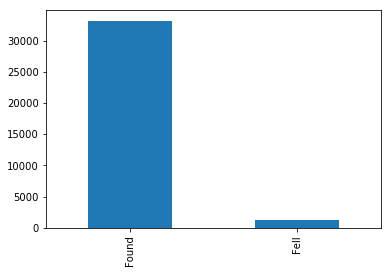

In [236]:
df['fell_found'].value_counts()[:2].plot(kind='bar');

## Exercises for you

Select all the meteorites which fell after 1999. 

In [ ]:
# your code 

Select all of the metorites of type 'L6' which fell after 1999

In [ ]:
# your code 

Find the masses of the heaviest 5 meteors

In [ ]:
# your code 

Plot a histogram showing the number of metorites by meteorite type. Show only the 10 most common types of meteorites to have fallen.  

In [ ]:
# your code 

Plot the number of metorites which fell each year after 1999. 

In [ ]:
# your code 

Which years had the biggest average meteors?

In [ ]:
## your code

### Task (optional): recreate the data science in this [FiveThirtyEight story](https://fivethirtyeight.com/features/some-people-are-too-superstitious-to-have-a-baby-on-friday-the-13th/)
We provide the data from their github, which you will need to merge, or join, or concatenate. 
Please only use Pandas.

In [ ]:
births_94_03 = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/births/US_births_1994-2003_CDC_NCHS.csv')
births_00_14 = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/births/US_births_2000-2014_SSA.csv')